In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split


classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [2]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized


2023-04-13 09:54:47.971103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 09:54:48.005515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 09:54:48.005715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 09:54:48.006685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

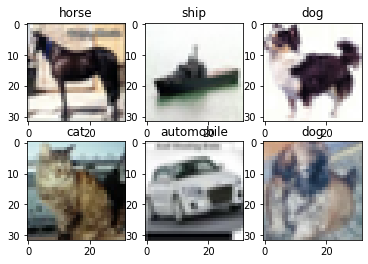

(40000, 32, 32, 3)
(40000,)
(10000, 32, 32, 3)
(10000,)
(10000, 32, 32, 3)
(10000,)


In [3]:
cifar= tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
train_images,val_images,train_labels,val_labels = train_test_split(train_images, train_labels, test_size = 0.2)


train_labels = train_labels.reshape(-1,)
val_labels = val_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(classes[train_labels[i]])
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(val_images.shape)
print(val_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  ### Pretrained Model







In [4]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))

model.add(tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling='avg',
    classes=10
    ))
for layer in model.layers:
        layer.trainable=False 

model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model.summary()


In [5]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
result=model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,validation_data = (val_images, val_labels))



Epoch 1/10


2023-04-13 09:54:55.847106: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2023-04-13 09:54:56.304444: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-13 09:54:56.304862: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-13 09:54:56.304888: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-04-13 09:54:56.314148: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-13 09:54:56.314224: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


625/625 [==============================] - 11s 11ms/step - loss: 1.3779 - accuracy: 0.5274 - val_loss: 1.1890 - val_accuracy: 0.5861
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 1.1647 - accuracy: 0.5900 - val_loss: 1.1395 - val_accuracy: 0.6020
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 1.1081 - accuracy: 0.6079 - val_loss: 1.1234 - val_accuracy: 0.6082
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 1.0601 - accuracy: 0.6245 - val_loss: 1.1023 - val_accuracy: 0.6123
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 1.0250 - accuracy: 0.6364 - val_loss: 1.0938 - val_accuracy: 0.6135
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.9808 - accuracy: 0.6521 - val_loss: 1.0935 - val_accuracy: 0.6150
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.9447 - accuracy: 0.6640 - val_loss: 1.1016 - val_accuracy: 0.6187
Epoch 8/1

In [6]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

157/157 [==============================] - 1s 8ms/step - loss: 1.1135 - accuracy: 0.6174
Accuracy :  0.6173999905586243


### Predicting 

Prediction Class Label :  1
Prediction Class Name  :  automobile
Actual Class Name  :  truck


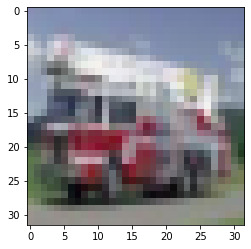

In [32]:
# cnt =random.randint(100)
# # cnt =4

# plt.imshow(test_images[cnt],cmap='gray')

# preds= model(test_images[:100])

# label= np.argmax(preds[cnt])

# # print pred + Image
# plt.imshow(test_images[cnt],cmap='gray')
# print("Prediction Class Label : ",test_labels[label])
# print("Prediction Class Name  : ",classes[test_labels[label]])
# print("Actual Class Name  : ",classes[test_labels[cnt]])


#### Graphs

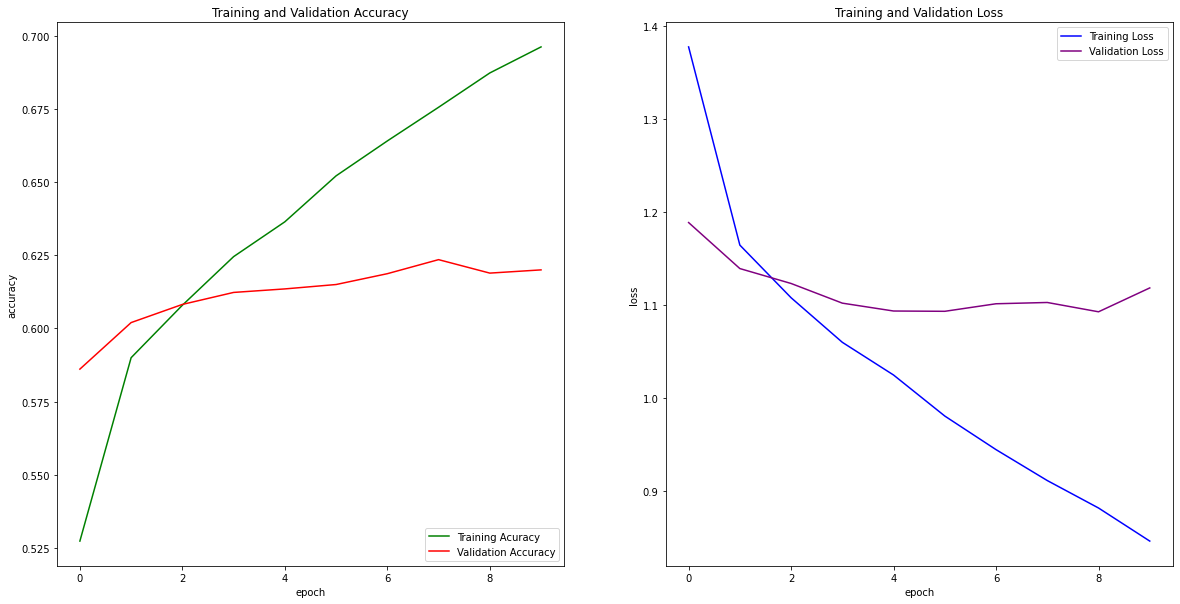

In [8]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Accuracy")
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(loss,color = 'blue',label = 'Training Loss')
plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()


#### Confusion Matrix / Heat Map

313/313 [==============================] - 3s 7ms/step


<AxesSubplot:>

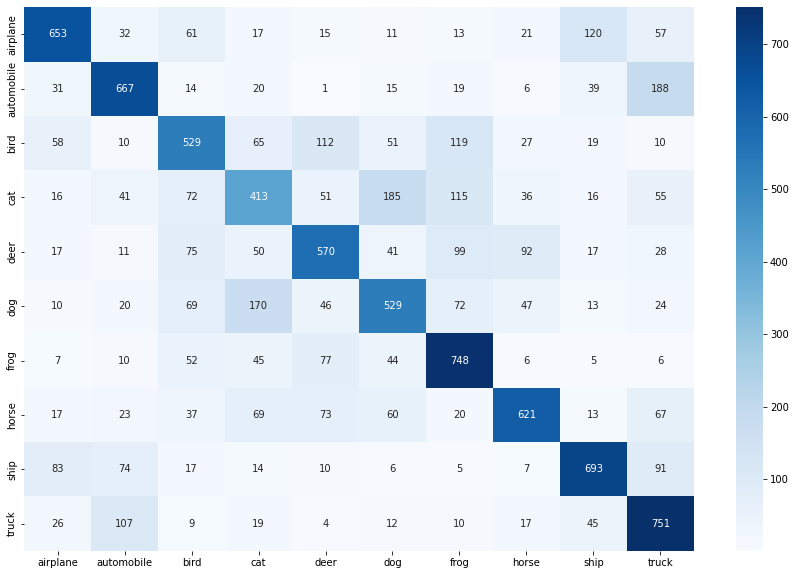

In [9]:
y_pred = np.argmax(model.predict(test_images), axis=1)
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")